## Import needed modules

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import h5py
%env KMP_DUPLICATE_LIB_OK=TRUE

env: KMP_DUPLICATE_LIB_OK=TRUE


## Set image dims

In [2]:
img_width, img_height = 128, 128


In [3]:
test_datagen = ImageDataGenerator(
    rescale=1./255)


test_generator = test_datagen.flow_from_directory(
    './dogs-vs-cats/test',
    target_size=(img_width, img_height),
    batch_size=32,
    class_mode='binary')

Found 1000 images belonging to 2 classes.


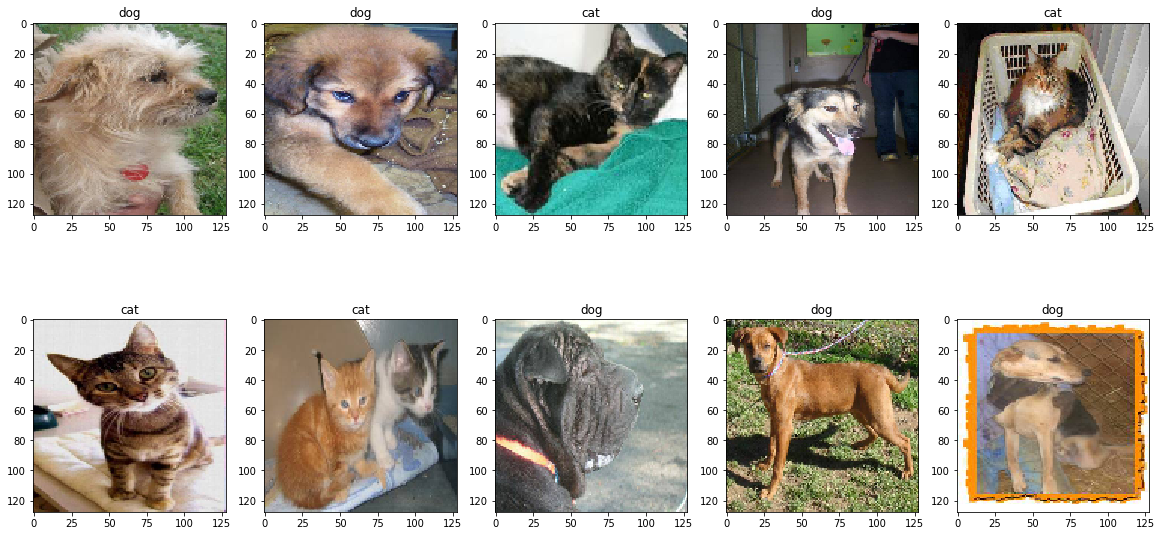

In [4]:
images, labels = test_generator.next()
rows = 2
cols = 5

fig, ax = plt.subplots(rows, cols, figsize=(20, 10))
for row in range(rows):
    for col in range(cols):
        ax[row, col].set_title('cat' if labels[row*cols + col] == 0 else 'dog')
        ax[row, col].imshow(images[row*cols + col])
plt.show()

## Use load_model function to load trained model from file "trained_model.h5"

In [5]:
# load model using tf.keras.models.load_model
model = tf.keras.models.load_model("trained_model.h5")
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten (Flatten)            (None, 8192)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               1048704   
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 129       
Total params: 15,763,521
Trainable params: 1,048,833
Non-trainable params: 14,714,688
_________________________________________________________________


## Use loaded model to predict what is on picture

/Users/hubertskrzypczak/opt/anaconda3/envs/gradient_env/lib/python3.7/site-packages/matplotlib/text.py:1150: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


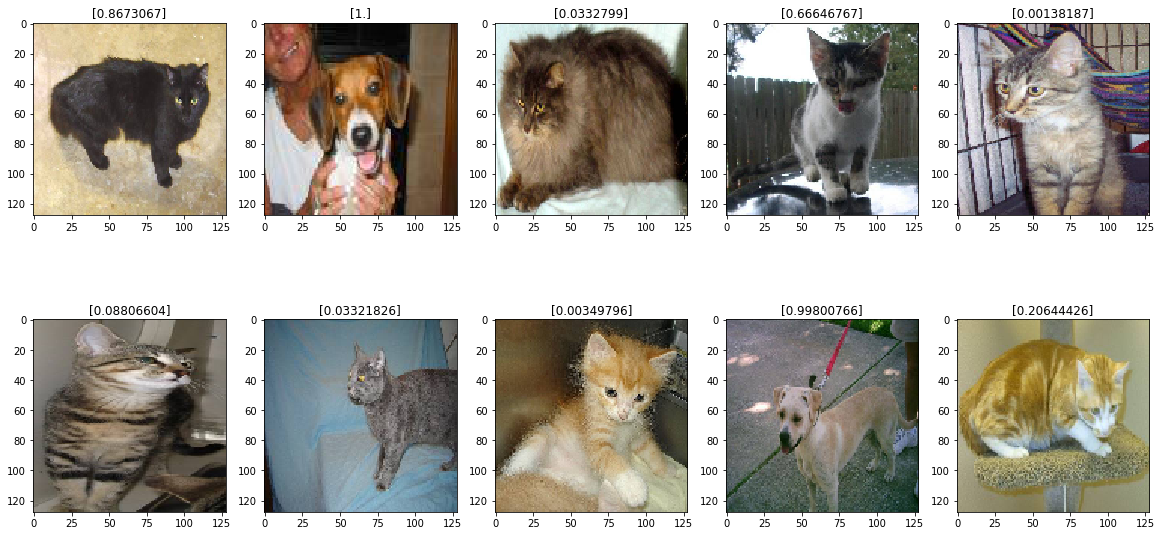

In [7]:
# predict images with model and show pictures with output of model
images, _ = test_generator.next()
rows = 2
cols = 5

predictions = model.predict(images)

fig, ax = plt.subplots(rows, cols, figsize=(20, 10))
for row in range(rows):
    for col in range(cols):
        ax[row, col].set_title(predictions[row*cols + col])
        ax[row, col].imshow(images[row*cols + col])
plt.show()

## Use model to predict what is on picture from Marcin slides

[[0.11359846]]


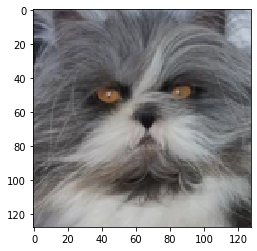

In [9]:
image = plt.imread("cat.png")
image = image[:, :, :3]
image = np.reshape(image, (1, 128, 128, 3))

print(model.predict(image))
plt.imshow(image[0])

In [10]:
model.evaluate_generator(test_generator)

[0.20160022703930736, 0.913]